# Sagar Kumar 210968002
# DSE B Batch 1
# Week 2 - ANN

In [44]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
keras = tf.keras
from keras.layers import Dense
from keras import Sequential
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
from keras.metrics import Recall, Precision
from sklearn.preprocessing import StandardScaler
import itertools as it
from sklearn.metrics import precision_score, accuracy_score, recall_score

In [2]:
df = pd.read_csv("churn.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [5]:
df.duplicated().any()

False

In [6]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df = pd.get_dummies(df, dtype=np.int32)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [8]:
df['Balance'] = df['Balance'].mask(df['Balance'] == 0).fillna(df['Balance'].mean())
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,76485.889288,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.860000,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.800000,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,76485.889288,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.820000,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,76485.889288,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.610000,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,76485.889288,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.310000,2,1,0,92888.52,1,0,1,0,0,1


In [9]:
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = StandardScaler().fit_transform(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-0.869761,-0.911583,1,1,0.021886,1,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,-0.639565,-0.911583,0,1,0.216534,0,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.745183,2.527057,1,0,0.240687,1,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-0.869761,0.807737,0,0,-0.108918,0,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.671538,-0.911583,1,1,-0.365276,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-0.869761,0.807737,1,0,-0.066419,0,1,0,0,0,1
9996,-1.391939,-0.373958,1.724464,-1.470759,-0.911583,1,1,0.027988,0,1,0,0,0,1
9997,0.604988,-0.278604,0.687130,-0.869761,-0.911583,0,1,-1.008643,1,1,0,0,1,0
9998,1.256835,0.293517,-0.695982,-0.914108,0.807737,1,0,-0.125231,1,0,1,0,0,1


In [10]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [11]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-0.869761,-0.911583,1,1,0.021886,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,-0.639565,-0.911583,0,1,0.216534,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.745183,2.527057,1,0,0.240687,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-0.869761,0.807737,0,0,-0.108918,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.671538,-0.911583,1,1,-0.365276,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-0.869761,0.807737,1,0,-0.066419,1,0,0,0,1
9996,-1.391939,-0.373958,1.724464,-1.470759,-0.911583,1,1,0.027988,1,0,0,0,1
9997,0.604988,-0.278604,0.687130,-0.869761,-0.911583,0,1,-1.008643,1,0,0,1,0
9998,1.256835,0.293517,-0.695982,-0.914108,0.807737,1,0,-0.125231,0,1,0,0,1


In [12]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Model

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1034,0.129037,0.674932,-0.695982,-0.869761,0.807737,0,1,1.324796,1,0,0,0,1
7994,-1.360899,-1.708908,-1.387538,1.494948,2.527057,1,1,1.218072,0,1,0,1,0
516,-1.888585,1.628468,1.724464,-0.869761,2.527057,0,1,-0.657884,1,0,0,1,0
44,0.097996,2.105236,-0.004426,1.627925,-0.911583,1,1,1.012877,0,0,1,1,0
1406,-0.812520,-1.518201,-1.041760,0.714380,-0.911583,0,1,-0.574709,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-0.305528,0.770285,0.687130,0.100997,-0.911583,1,1,-0.578897,0,1,0,0,1
7813,0.346319,2.295943,-0.695982,-0.720114,-0.911583,1,0,-0.529442,0,1,0,1,0
905,0.222158,0.579578,1.378686,-0.869761,-0.911583,1,1,-0.140200,1,0,0,1,0
5192,0.129037,0.007457,1.032908,-0.869761,0.807737,1,1,0.018757,1,0,0,1,0


In [14]:
dims = X_train.shape[1]
dims

13

In [15]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

2023-09-05 20:10:30.566176: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-05 20:10:31.842806: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-05 20:10:31.842890: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-05 20:10:31.883663: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-05 20:10:31.883757: I tensorflow/compile

In [28]:
models = list(it.repeat([
    Sequential([
        Dense(128, activation='relu', input_shape=(dims,)),
        Dense(1, activation='sigmoid', input_shape=(dims,)),
    ]),
    Sequential([
        Dense(128, activation='relu', input_shape=(dims,)),
        Dense(64, activation='relu', input_shape=(dims,)),
        Dense(1, activation='sigmoid', input_shape=(dims,)),
    ]),
    Sequential([
        Dense(128, activation='relu', input_shape=(dims,)),
        Dense(64, activation='relu', input_shape=(dims,)),
        Dense(32, activation='relu', input_shape=(dims,)),
        Dense(1, activation='sigmoid', input_shape=(dims,)),
    ]),
], 9))
models

[[<keras.src.engine.sequential.Sequential at 0x7fe840434ed0>,

In [29]:
batch_size = 32
epochs = [10, 20, 30]
learning_rate = [0.1, 0.01, 0.001]

In [30]:
for i in models:
    for j in range(len(i)):
        i[j].compile(optimizer=Adam(learning_rate=learning_rate[j]), loss='binary_crossentropy', metrics=['accuracy', Recall(), Precision()])

In [31]:
print(X_train.shape)
print(y_train.shape)

(8500, 13)
(8500,)


In [32]:
trains = [
    i[j].fit(X_train, y_train, epochs=epochs[j], batch_size=batch_size, validation_split=0.15) for j in range(len(i)) for i in models
]

Epoch 1/10


226/226 [==============================] - 4s 11ms/step - loss: 0.4185 - accuracy: 0.8280 - recall_78: 0.3595 - precision_78: 0.6271 - val_loss: 0.3696 - val_accuracy: 0.8329 - val_recall_78: 0.3150 - val_precision_78: 0.6723
Epoch 2/10
226/226 [==============================] - 2s 11ms/step - loss: 0.3839 - accuracy: 0.8447 - recall_78: 0.3849 - precision_78: 0.7116 - val_loss: 0.4158 - val_accuracy: 0.8306 - val_recall_78: 0.1693 - val_precision_78: 0.8958
Epoch 3/10
226/226 [==============================] - 2s 11ms/step - loss: 0.3778 - accuracy: 0.8484 - recall_78: 0.3924 - precision_78: 0.7302 - val_loss: 0.3661 - val_accuracy: 0.8502 - val_recall_78: 0.3661 - val_precision_78: 0.7561
Epoch 4/10
226/226 [==============================] - 2s 11ms/step - loss: 0.3752 - accuracy: 0.8502 - recall_78: 0.3759 - precision_78: 0.7587 - val_loss: 0.4093 - val_accuracy: 0.8502 - val_recall_78: 0.3346 - val_precision_78: 0.7944
Epoch 5/10
226/226 [==============================] - 2s 11ms/s

In [33]:
tlosses = [i.history['loss'] for i in trains]
tlosses

[[0.4184979200363159,
  0.38389211893081665,
  0.37779635190963745,
  0.37522417306900024,
  0.37441661953926086,
  0.3731861412525177,
  0.36694806814193726,
  0.3708924949169159,
  0.37795209884643555,
  0.37557321786880493],
 [0.37336722016334534,
  0.37967202067375183,
  0.3717767596244812,
  0.3680538237094879,
  0.3767828941345215,
  0.3734991252422333,
  0.37525418400764465,
  0.38405776023864746,
  0.374654084444046,
  0.3731370270252228],
 [0.36924272775650024,
  0.3765835165977478,
  0.37092307209968567,
  0.3797426223754883,
  0.3698819577693939,
  0.3719903826713562,
  0.36968445777893066,
  0.36572906374931335,
  0.37828394770622253,
  0.37477749586105347],
 [0.37433844804763794,
  0.37120160460472107,
  0.3784770667552948,
  0.37581244111061096,
  0.3800082504749298,
  0.37587037682533264,
  0.3827883303165436,
  0.3689378499984741,
  0.37279269099235535,
  0.370512992143631],
 [0.36869633197784424,
  0.3766081631183624,
  0.3722468912601471,
  0.3801928758621216,
  0.369

In [34]:
vlosses = [i.history['val_loss'] for i in trains]
vlosses

[[0.36955758929252625,
  0.4157605767250061,
  0.366096168756485,
  0.4092985987663269,
  0.3605567216873169,
  0.36552777886390686,
  0.36114269495010376,
  0.35211509466171265,
  0.36774638295173645,
  0.3828819692134857],
 [0.3667071759700775,
  0.37660273909568787,
  0.36930719017982483,
  0.3750441372394562,
  0.36252981424331665,
  0.4042855203151703,
  0.3691723048686981,
  0.3562708795070648,
  0.36239737272262573,
  0.3602675199508667],
 [0.3614979386329651,
  0.3675938844680786,
  0.3651929497718811,
  0.365629106760025,
  0.3673838973045349,
  0.3675698935985565,
  0.36960476636886597,
  0.372225821018219,
  0.36565831303596497,
  0.3699193000793457],
 [0.3764037489891052,
  0.37839600443840027,
  0.39265480637550354,
  0.4080188572406769,
  0.43345093727111816,
  0.356929749250412,
  0.3871203362941742,
  0.3702336549758911,
  0.38643160462379456,
  0.37870776653289795],
 [0.3838721811771393,
  0.3737545609474182,
  0.4170200526714325,
  0.38090673089027405,
  0.38114154338

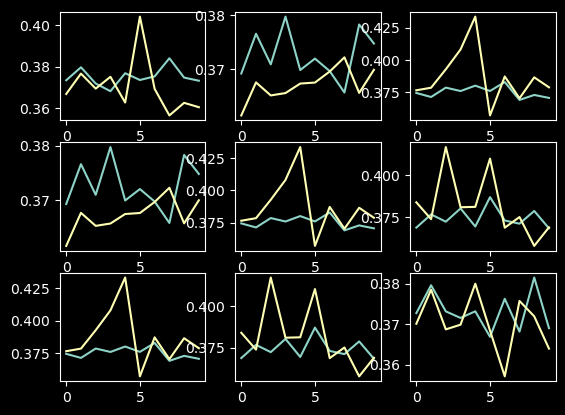

In [35]:
epoch_index = 0
fig, axs = plt.subplots(3, 3)

for j in range(3):
    for k in range(3):
        axs[j, k].plot(range(epochs[epoch_index]), tlosses[1 + j + k])
        axs[j, k].plot(range(epochs[epoch_index]), vlosses[1 + j + k])

        

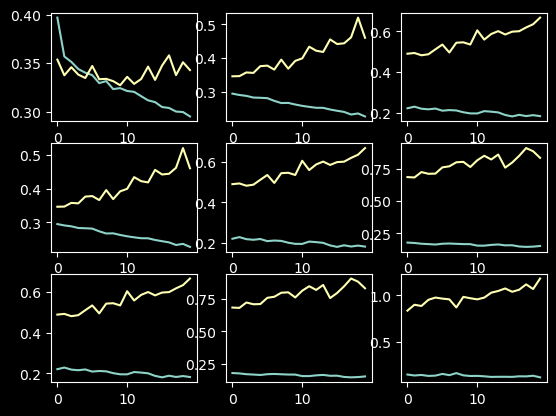

In [36]:
epoch_index = 1
fig, axs = plt.subplots(3, 3)

for j in range(3):
    for k in range(3):
        axs[j, k].plot(range(epochs[epoch_index]), tlosses[9 + j + k])
        axs[j, k].plot(range(epochs[epoch_index]), vlosses[9 + j + k])
        

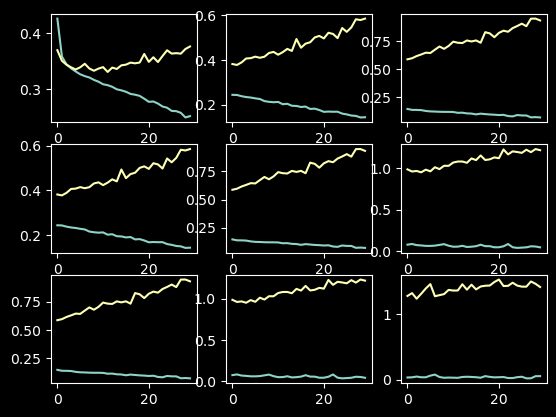

In [37]:
epoch_index = 2
fig, axs = plt.subplots(3, 3)

for j in range(3):
    for k in range(3):
        axs[j, k].plot(range(epochs[epoch_index]), tlosses[18 + j + k])
        axs[j, k].plot(range(epochs[epoch_index]), vlosses[18 + j + k])
        

### Evaluation

In [39]:
k = 1
for i in range(9):
  for model in models[i]:
    loss, accuracy, recall, precision = model.evaluate(X_test,y_test)
    print(f"model: {k} --> loss: {loss}, accuracy: {accuracy}, recall: {recall}, precision: {precision}")
    k += 1

47/47 [==============================] - 0s 8ms/step - loss: 0.3734 - accuracy: 0.8320 - recall_78: 0.2439 - precision_78: 0.9524
model: 1 --> loss: 0.3734409511089325, accuracy: 0.8320000171661377, recall: 0.24390244483947754, precision: 0.9523809552192688
47/47 [==============================] - 0s 8ms/step - loss: 1.4719 - accuracy: 0.8200 - recall_79: 0.5183 - precision_79: 0.6028
model: 2 --> loss: 1.4719411134719849, accuracy: 0.8199999928474426, recall: 0.5182926654815674, precision: 0.6028369069099426
47/47 [==============================] - 0s 7ms/step - loss: 1.9968 - accuracy: 0.8100 - recall_80: 0.4756 - precision_80: 0.5799
model: 3 --> loss: 1.9968457221984863, accuracy: 0.8100000023841858, recall: 0.47560974955558777, precision: 0.5799256563186646
47/47 [==============================] - 0s 7ms/step - loss: 0.3734 - accuracy: 0.8320 - recall_78: 0.2439 - precision_78: 0.9524
model: 4 --> loss: 0.3734409511089325, accuracy: 0.8320000171661377, recall: 0.24390244483947754,

In [67]:
acc = []
rec = []
prec = []
for i in range(9):
  for model in models[i]:
    y_pred = model.predict(X_test)
    labels = np.where(y_pred > 0.5, 1, 0)
    acc.append(accuracy_score(y_test, labels))
    rec.append(recall_score(y_test, labels))
    prec.append(precision_score(y_test, labels))

 1/47 [..............................] - ETA: 1s

47/47 [==============================] - 0s 3ms/step


In [70]:
pd.DataFrame({
    "Model": range(1, 28),
    "Accuracy": acc,
    "Recall": rec,
    "Precision": prec
})

,Model,Accuracy,Recall,Precision
0,1,0.832,0.243902,0.952381
1,2,0.820,0.518293,0.602837
2,3,0.810,0.475610,0.579926
3,4,0.832,0.243902,0.952381
4,5,0.820,0.518293,0.602837
5,6,0.810,0.475610,0.579926
6,7,0.832,0.243902,0.952381
7,8,0.820,0.518293,0.602837
8,9,0.810,0.475610,0.579926
9,10,0.832,0.243902,0.952381
